# UW Data Science - Methods of Data Analysis
## Dave Wine 8430191
## Assignment 1: Building Energy Efficiency Analysis



# Summary:
TBD


# Main Analysis:
First, read in necessary packages:

In [7]:
require(ggplot2)
require(car)

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.2"Loading required package: car
Warning message:
"package 'car' was built under R version 3.3.2"

 Define some useful functions -
 First, a file read function

In [2]:
read.bldg = function(file = 'EnergyEfficiencyData.csv'){

bldg.data <- read.csv(file, header=TRUE, stringsAsFactors=FALSE)

factcols <- c('Orientation','Glazing.Area.Distribution')

bldg.data[, factcols]<-lapply(bldg.data[,factcols], as.numeric)

bldg.data[complete.cases(bldg.data),]
    }

2D Scatterplot function
This works OK but I haven't figured out how to pass or infer labels yet....

In [3]:

plots.2DS=function(x,y,c){ 
ggplot(bldg.data, aes(x, y)) + geom_point(aes(color = factor(c))) 
  #+ 
  #xlab(x) + ylab(y) + 
  #ggtitle('Relationship between'+ x +' and ' + y +' \n with '+c+' Shown')
}

Read the data file in and view summary statistics:

In [4]:
bldg.data = read.bldg()


str(bldg.data)
summary(bldg.data)

'data.frame':	768 obs. of  10 variables:
 $ Relative.Compactness     : num  0.98 0.98 0.98 0.98 0.9 0.9 0.9 0.9 0.86 0.86 ...
 $ Surface.Area             : num  514 514 514 514 564 ...
 $ Wall.Area                : num  294 294 294 294 318 ...
 $ Roof.Area                : num  110 110 110 110 122 ...
 $ Overall.Height           : num  7 7 7 7 7 7 7 7 7 7 ...
 $ Orientation              : num  2 3 4 5 2 3 4 5 2 3 ...
 $ Glazing.Area             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Glazing.Area.Distribution: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Heating.Load             : num  15.6 15.6 15.6 15.6 20.8 ...
 $ Cooling.Load             : num  21.3 21.3 21.3 21.3 28.3 ...


 Relative.Compactness  Surface.Area     Wall.Area       Roof.Area    
 Min.   :0.6200       Min.   :514.5   Min.   :245.0   Min.   :110.2  
 1st Qu.:0.6825       1st Qu.:606.4   1st Qu.:294.0   1st Qu.:140.9  
 Median :0.7500       Median :673.8   Median :318.5   Median :183.8  
 Mean   :0.7642       Mean   :671.7   Mean   :318.5   Mean   :176.6  
 3rd Qu.:0.8300       3rd Qu.:741.1   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9800       Max.   :808.5   Max.   :416.5   Max.   :220.5  
 Overall.Height  Orientation    Glazing.Area    Glazing.Area.Distribution
 Min.   :3.50   Min.   :2.00   Min.   :0.0000   Min.   :0.000            
 1st Qu.:3.50   1st Qu.:2.75   1st Qu.:0.1000   1st Qu.:1.750            
 Median :5.25   Median :3.50   Median :0.2500   Median :3.000            
 Mean   :5.25   Mean   :3.50   Mean   :0.2344   Mean   :2.812            
 3rd Qu.:7.00   3rd Qu.:4.25   3rd Qu.:0.4000   3rd Qu.:4.000            
 Max.   :7.00   Max.   :5.00   Max.   :0.4000   Max.   :5.000     

Initial Observations:  Overall Height, Orientation, Glazing Area Distribution seem to be numerical factors rather than data per se.

Create factors for appropriate variables

In [5]:
factOrient <- cut(bldg.data$Orientation,breaks=4,labels=1:4)

factDist <- cut(bldg.data$Glazing.Area.Distribution,breaks=6,labels=1:6)

factHeight <- cut(bldg.data$Overall.Height,breaks=2,labels=1:2)

Next, look at overall variable correlations

Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit negative part of the spread"

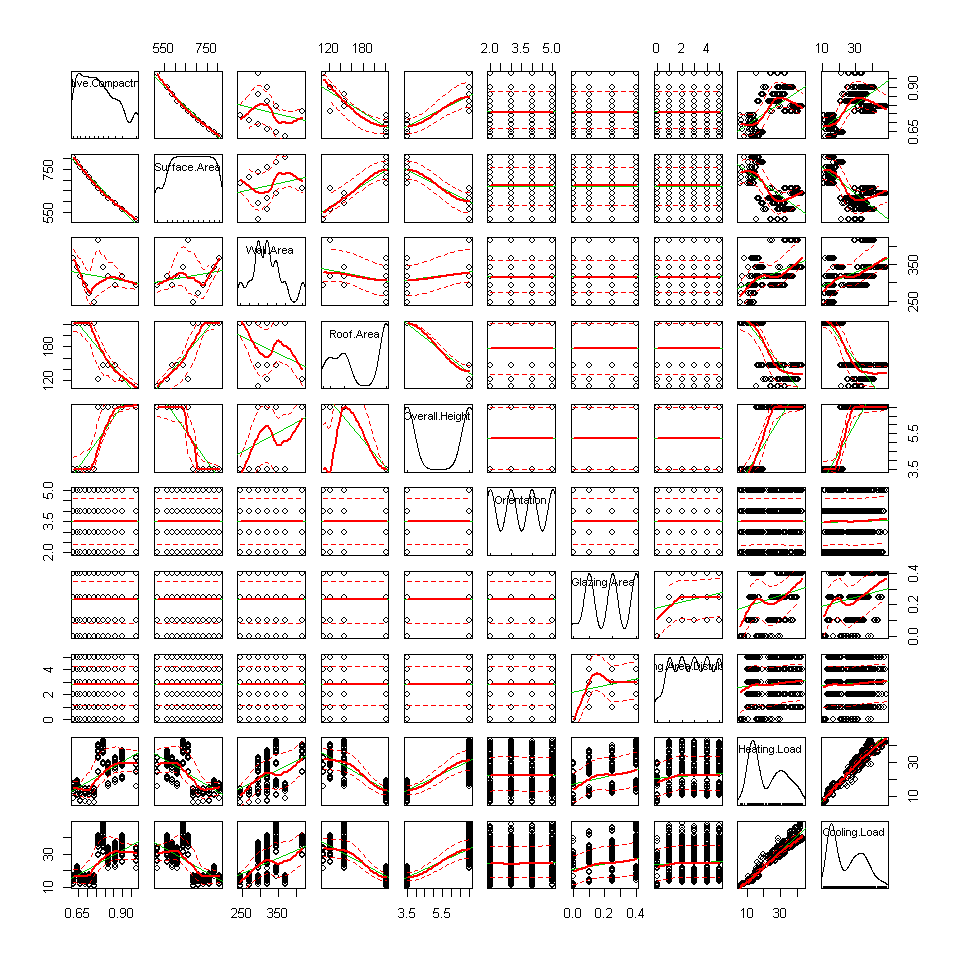

In [10]:
options(repr.plot.width=8, repr.plot.height=8)
scatterplotMatrix(~ Relative.Compactness + Surface.Area + Wall.Area + Roof.Area + 
Overall.Height + Orientation + Glazing.Area + Glazing.Area.Distribution + Heating.Load + Cooling.Load, data = bldg.data)

## Some Observations:
Heating and Cooling Loads are very similar and obviously bimodal.
Neither appear to depend strongly on Orientation or Glazing Area Distribution.
Maybe there is a weak linear dependence on Glazing Area
Notice that Overall Height and Roof Area are sort of inversely correlated to Wall Area.  Looks sort of cubic.

Let's explore that first.  We would expect some correlation between Height, Wall & Roof Areas, Surface Area, and Glazing Area.  If we plot Wall vs Roof Area with height as a factor something interesting happens:

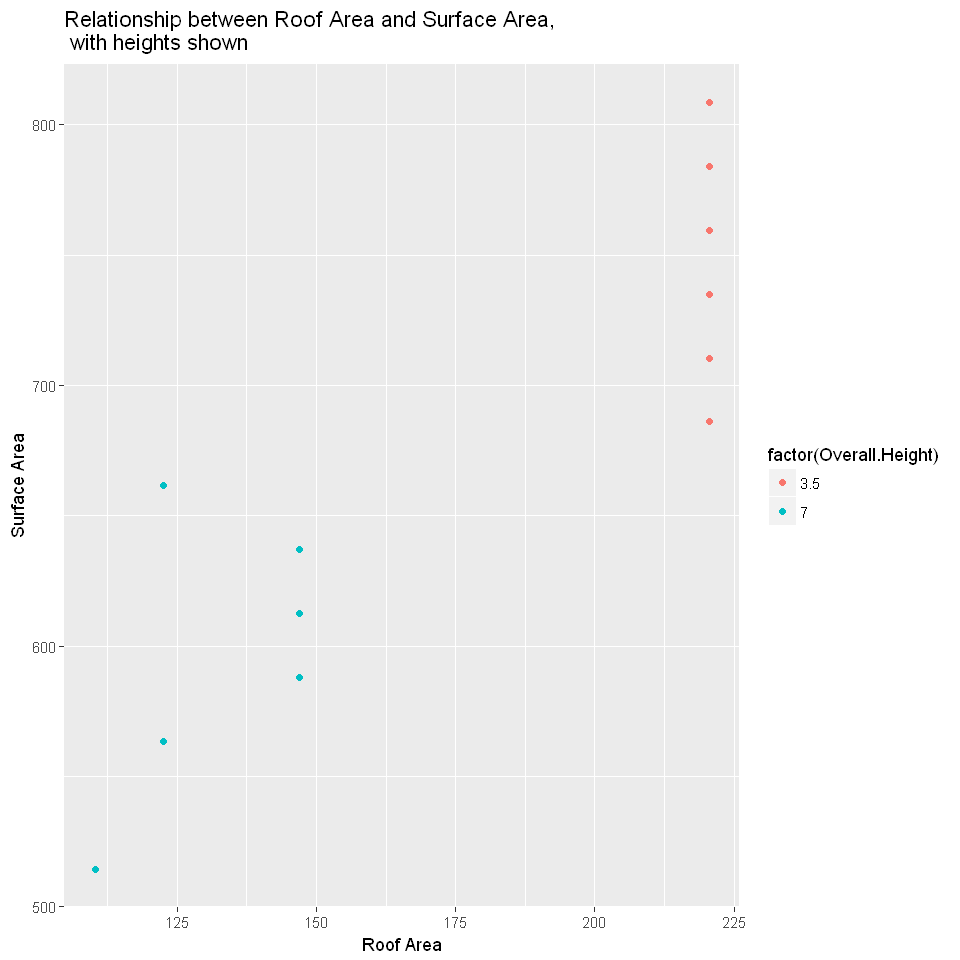

In [11]:
ggplot(bldg.data, aes(Roof.Area, Surface.Area)) + geom_point(aes(color = factor(Overall.Height))) + 
  xlab('Roof Area') + ylab('Surface Area') + 
  ggtitle('Relationship between Roof Area and Surface Area, \n with heights shown')

Short buildings all have the same roof area.  Let's split the dataset into tall and short buildings:

In [12]:
Short<-subset(bldg.data,Overall.Height==3.5)
str(Short)
Tall<-subset(bldg.data,Overall.Height==7)
str(Tall)

'data.frame':	384 obs. of  10 variables:
 $ Relative.Compactness     : num  0.74 0.74 0.74 0.74 0.71 0.71 0.71 0.71 0.69 0.69 ...
 $ Surface.Area             : num  686 686 686 686 710 ...
 $ Wall.Area                : num  245 245 245 245 270 ...
 $ Roof.Area                : num  220 220 220 220 220 ...
 $ Overall.Height           : num  3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 ...
 $ Orientation              : num  2 3 4 5 2 3 4 5 2 3 ...
 $ Glazing.Area             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Glazing.Area.Distribution: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Heating.Load             : num  6.07 6.05 6.01 6.04 6.37 6.4 6.37 6.4 6.85 6.79 ...
 $ Cooling.Load             : num  10.9 11.2 10.9 11.2 11.3 ...
'data.frame':	384 obs. of  10 variables:
 $ Relative.Compactness     : num  0.98 0.98 0.98 0.98 0.9 0.9 0.9 0.9 0.86 0.86 ...
 $ Surface.Area             : num  514 514 514 514 564 ...
 $ Wall.Area                : num  294 294 294 294 318 ...
 $ Roof.Area                : num  110 110

So the data set is evenly split between tall and short buildings.  All short buildings have the same roof area. This implies some standard kind of building.  Since there is variation in heating load:

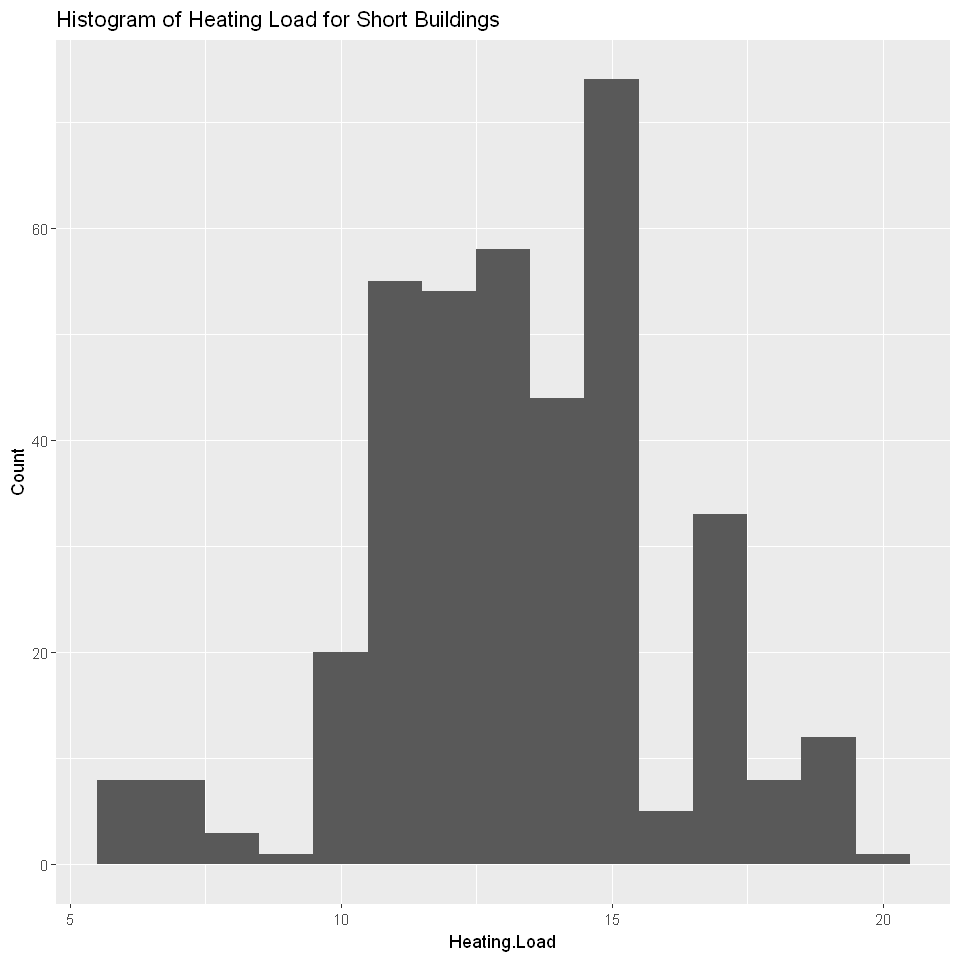

In [19]:
ggplot(Short, aes(Heating.Load)) + geom_histogram(binwidth = 1) + 
xlab('Heating.Load') + ylab('Count')+ ggtitle('Histogram of Heating Load for Short Buildings')

And the heating load does not seem to be strongly dependent on Surface Area:


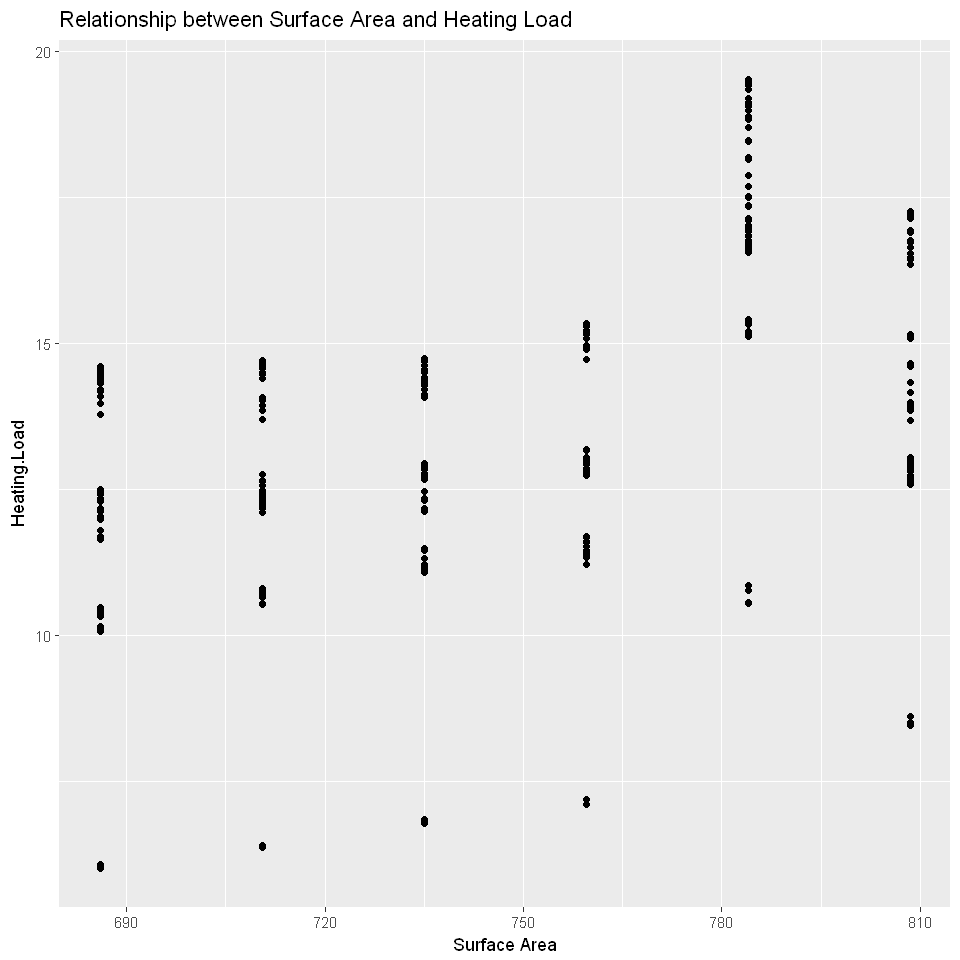

In [20]:
ggplot(Short, aes(x = Surface.Area, y = Heating.Load)) + geom_point() + 
  xlab('Surface Area') + ylab('Heating.Load') + 
  ggtitle('Relationship between Surface Area and Heating Load')

 It's also interesting to note that Surface Area is pretty discretized.  This may imply that short buildings have some discrete multiplier, maybe they have discrete heights.  But it's confusing because of the change at 780, and because the height variable implies they are all the same height.  More info on the dataset or a different analysis is needed here.

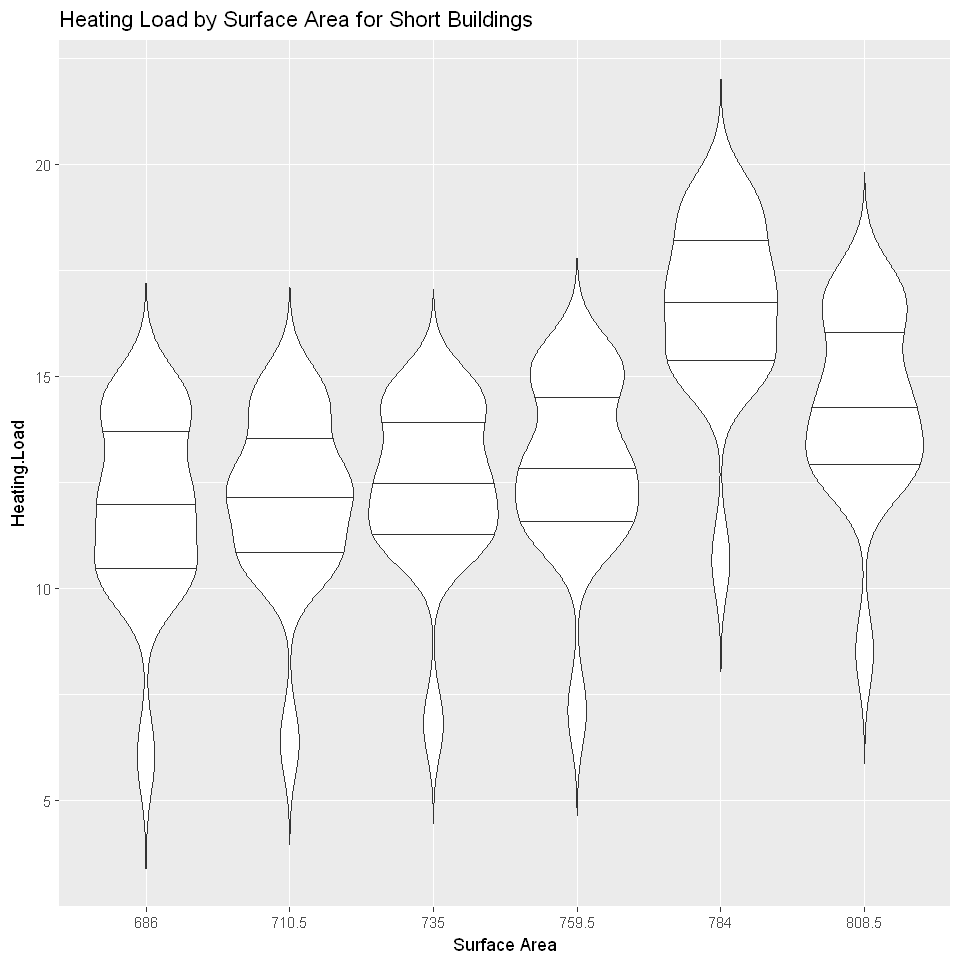

In [22]:
ggplot(Short, aes(x = factor(Surface.Area), y = Heating.Load)) + 
  geom_violin(trim = FALSE, draw_quantiles = c(0.25, 0.5, 0.75)) + xlab('Surface Area')  + 
  ggtitle('Heating Load by Surface Area for Short Buildings')

However, since the shape of the variation is similar for all surface areas, let's look in another direction, namely glazing area: